In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
current_palette = sns.color_palette()
import warnings
warnings.filterwarnings('ignore')
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from IPython.display import clear_output
sns.set_style('darkgrid')
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import calinski_harabasz_score, silhouette_score

from sklearn.preprocessing import StandardScaler
import obtain as ob

## Obtain

In [2]:
poverty_df = ob.upload_county_acs_data('ACSDP5Y2012.DP03_data_with_overlays_2019-12-31T163946.csv')
df = poverty_df
population_df = ob.upload_county_acs_data('ACSDP5Y2012.DP05_data_with_overlays_2019-12-31T193014.csv')
df = ob.merge_acs_data(df,population_df)
df = ob.remove_duplicate_countystate(df) 


In [3]:

clean2, object_df = ob.separate_num_columns(df)
#clean = clean.drop(columns= ['ratio_to_max_payment', '_Average_Total_Payments_'])
scaler = StandardScaler()
scaled_df = scaler.fit_transform(clean2)




In [4]:
cluster = list(range(2,30))
calinski_harabasz_list = []

for i in cluster:
    # Set number of clusters at initialization time
    k_means = KMeans(n_clusters=i)

    # Run the clustering algorithm
    k_means.fit(scaled_df) 

    # Generate cluster index values for each row
    cluster_assignments = k_means.predict(scaled_df) 
    
    transfer_dict = {'Score':calinski_harabasz_score(scaled_df, cluster_assignments), 'Cluster':i}
    calinski_harabasz_list.append(transfer_dict)
    
    print(transfer_dict)

{'Score': 964.0839782890691, 'Cluster': 2}
{'Score': 822.124395359812, 'Cluster': 3}
{'Score': 738.8093310077869, 'Cluster': 4}
{'Score': 717.4500496274605, 'Cluster': 5}
{'Score': 658.1267723836969, 'Cluster': 6}
{'Score': 605.7567938205392, 'Cluster': 7}
{'Score': 565.2842067952566, 'Cluster': 8}
{'Score': 529.8861613584114, 'Cluster': 9}
{'Score': 494.77846387095923, 'Cluster': 10}
{'Score': 469.3436203087654, 'Cluster': 11}
{'Score': 454.3778242563337, 'Cluster': 12}
{'Score': 434.4014711078811, 'Cluster': 13}
{'Score': 408.88205194399535, 'Cluster': 14}
{'Score': 395.6157570148299, 'Cluster': 15}
{'Score': 382.82897996518443, 'Cluster': 16}
{'Score': 371.2361249410161, 'Cluster': 17}
{'Score': 353.9082409110483, 'Cluster': 18}
{'Score': 345.0528957464015, 'Cluster': 19}
{'Score': 332.8908198884942, 'Cluster': 20}
{'Score': 323.65294705041407, 'Cluster': 21}
{'Score': 317.15100101095277, 'Cluster': 22}
{'Score': 307.25640552104835, 'Cluster': 23}
{'Score': 298.9261048401641, 'Clust

<Figure size 360x576 with 0 Axes>

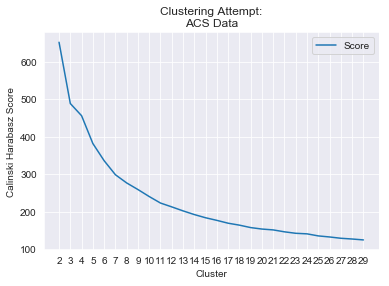

In [27]:
plt.figure(figsize=(5,8))
acs = pd.DataFrame(calinski_harabasz_list).set_index('Cluster')
pd.DataFrame(calinski_harabasz_list).set_index('Cluster').plot(label='ACS Data')
plt.title("Clustering Attempt:\nACS Data")
plt.ylabel('Calinski Harabasz Score')
plt.xticks(range(2,30))
plt.show()

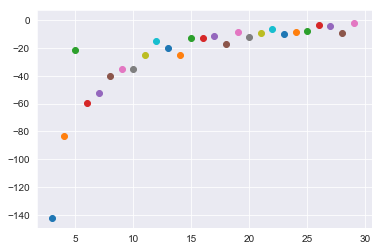

In [6]:
last = calinski_harabasz_list[0]['Score']
for i in calinski_harabasz_list[1:]:
    plt.scatter(i['Cluster'],(i['Score']- last))
    last = i['Score']

In [7]:
cms_df = ob.cms_data()
provider_index = cms_df.Provider_Id.value_counts().loc[cms_df.Provider_Id.value_counts()>= 50].index
cms_df = cms_df.loc[cms_df.Provider_Id.apply(lambda x: x in provider_index)]

In [8]:
label_df = ob.cms_procedure_dummy_labels(cms_df)
for i in label_df.columns:
    label_df[i] = label_df[i]* cms_df.ratio_to_max_payment
label_df['Provider_Id'] = cms_df['Provider_Id']
label_df = label_df.groupby('Provider_Id').max()

In [9]:
num_df, object_df = ob.separate_num_columns(label_df)
clean = num_df

scaler = StandardScaler()
scaled_df = scaler.fit_transform(clean)

In [10]:
cluster = list(range(2,30))
calinski_harabasz_list = []

for i in cluster:
    # Set number of clusters at initialization time
    k_means = KMeans(n_clusters=i)

    # Run the clustering algorithm
    k_means.fit(scaled_df) 

    # Generate cluster index values for each row
    cluster_assignments = k_means.predict(scaled_df) 
    
    transfer_dict = {'Score':calinski_harabasz_score(scaled_df, cluster_assignments), 'Cluster':i}
    calinski_harabasz_list.append(transfer_dict)
    
    print(transfer_dict)

{'Score': 616.8904220380089, 'Cluster': 2}
{'Score': 442.9980737600479, 'Cluster': 3}
{'Score': 344.6867071566404, 'Cluster': 4}
{'Score': 284.0031405650459, 'Cluster': 5}
{'Score': 247.46046458180712, 'Cluster': 6}
{'Score': 220.22988321430276, 'Cluster': 7}
{'Score': 196.93110784145892, 'Cluster': 8}
{'Score': 178.59540250708292, 'Cluster': 9}
{'Score': 163.89990251108495, 'Cluster': 10}
{'Score': 152.31199392689086, 'Cluster': 11}
{'Score': 141.53290149227578, 'Cluster': 12}
{'Score': 132.09948835882938, 'Cluster': 13}
{'Score': 123.95529968510668, 'Cluster': 14}
{'Score': 117.95115862920379, 'Cluster': 15}
{'Score': 111.44208033508485, 'Cluster': 16}
{'Score': 105.49090719001212, 'Cluster': 17}
{'Score': 100.17778847173501, 'Cluster': 18}
{'Score': 96.81576795200121, 'Cluster': 19}
{'Score': 92.3818530689666, 'Cluster': 20}
{'Score': 88.73487328434369, 'Cluster': 21}
{'Score': 85.68170052284906, 'Cluster': 22}
{'Score': 82.0073957527353, 'Cluster': 23}
{'Score': 79.66900276448965, 

<Figure size 360x576 with 0 Axes>

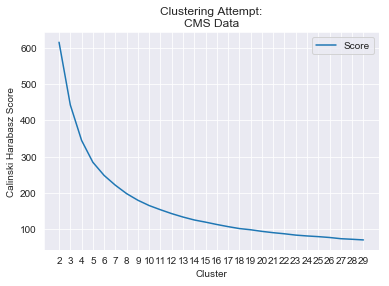

In [11]:
plt.figure(figsize=(5,8))
pd.DataFrame(calinski_harabasz_list).set_index('Cluster').plot()
plt.title("Clustering Attempt:\nCMS Data")
plt.ylabel('Calinski Harabasz Score')
plt.xticks(range(2,30))
plt.show()

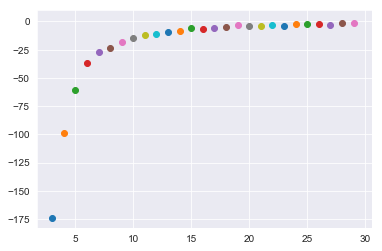

In [12]:
last = calinski_harabasz_list[0]['Score']
velocity =[0]
for i in calinski_harabasz_list[1:]:
    plt.scatter(i['Cluster'],(i['Score']- last))
    velocity.append(i['Score']- last)
    last = i['Score']


In [13]:
df = cms_df.merge(df.drop(columns =['County','State']), how='left', on=['CountyState'])
print(len(df))
label_df = df.groupby('Provider_Id').mean()
num_df, object_df = ob.separate_num_columns(label_df)
clean1 = num_df
print(len(num_df))
scaler = StandardScaler()
scaled_df = scaler.fit_transform(clean1)

125284
1618


In [14]:
cluster = list(range(2,30))
calinski_harabasz_list = []

for i in cluster:
    # Set number of clusters at initialization time
    k_means = KMeans(n_clusters=i)

    # Run the clustering algorithm
    k_means.fit(scaled_df) 
 
    # Generate cluster index values for each row
    cluster_assignments = k_means.predict(scaled_df) 
    
    transfer_dict = {'Score':calinski_harabasz_score(scaled_df, cluster_assignments), 'Cluster':i}
    calinski_harabasz_list.append(transfer_dict)
    
    print(transfer_dict)

{'Score': 651.2475491111336, 'Cluster': 2}
{'Score': 501.45320417108536, 'Cluster': 3}
{'Score': 455.7612772662894, 'Cluster': 4}
{'Score': 382.23314350272165, 'Cluster': 5}
{'Score': 335.88681822669065, 'Cluster': 6}
{'Score': 303.3287832513001, 'Cluster': 7}
{'Score': 276.72381582257424, 'Cluster': 8}
{'Score': 255.16567873397213, 'Cluster': 9}
{'Score': 242.2881318984355, 'Cluster': 10}
{'Score': 224.60458158012324, 'Cluster': 11}
{'Score': 215.5404829084765, 'Cluster': 12}
{'Score': 199.6131361357488, 'Cluster': 13}
{'Score': 194.22791401362622, 'Cluster': 14}
{'Score': 182.6004530927504, 'Cluster': 15}
{'Score': 178.54023535322963, 'Cluster': 16}
{'Score': 169.67257446322697, 'Cluster': 17}
{'Score': 164.52192629380667, 'Cluster': 18}
{'Score': 160.5420073613899, 'Cluster': 19}
{'Score': 156.44029137019749, 'Cluster': 20}
{'Score': 150.68103343310648, 'Cluster': 21}
{'Score': 147.54256960175468, 'Cluster': 22}
{'Score': 142.7145897012795, 'Cluster': 23}
{'Score': 138.2389998805651

<Figure size 360x576 with 0 Axes>

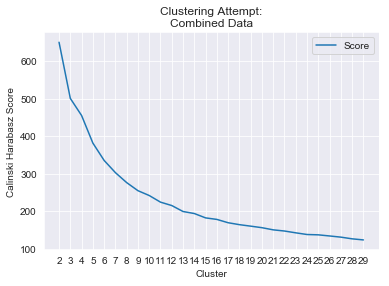

In [15]:
plt.figure(figsize=(5,8))
pd.DataFrame(calinski_harabasz_list).set_index('Cluster').plot()
plt.title("Clustering Attempt:\nCombined Data")
plt.ylabel('Calinski Harabasz Score')
plt.xticks(range(2,30))
plt.show()

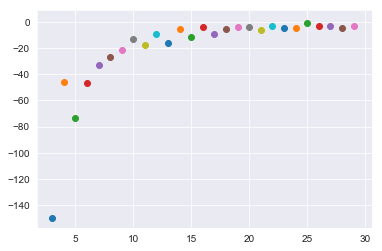

In [16]:
last = calinski_harabasz_list[0]['Score']
for i in calinski_harabasz_list[1:]:
    plt.scatter(i['Cluster'],(i['Score']- last))
    last = i['Score']

In [17]:
from sklearn.decomposition import PCA
pca= PCA()
scaled_df = pca.fit_transform(scaled_df)

In [18]:
cluster = list(range(2,30))
calinski_harabasz_list = []

for i in cluster:
    # Set number of clusters at initialization time
    k_means = KMeans(n_clusters=i)

    # Run the clustering algorithm
    k_means.fit(scaled_df) 
 
    # Generate cluster index values for each row
    cluster_assignments = k_means.predict(scaled_df) 
    
    transfer_dict = {'Score':calinski_harabasz_score(scaled_df, cluster_assignments), 'Cluster':i}
    calinski_harabasz_list.append(transfer_dict)
    
    print(transfer_dict)

{'Score': 651.2475491111348, 'Cluster': 2}
{'Score': 488.205586484079, 'Cluster': 3}
{'Score': 455.7612772662899, 'Cluster': 4}
{'Score': 381.78921033333353, 'Cluster': 5}
{'Score': 336.1080445478824, 'Cluster': 6}
{'Score': 298.790427922956, 'Cluster': 7}
{'Score': 276.94131892228813, 'Cluster': 8}
{'Score': 259.36504501503714, 'Cluster': 9}
{'Score': 240.73327901863377, 'Cluster': 10}
{'Score': 223.44777127674297, 'Cluster': 11}
{'Score': 213.2332571750426, 'Cluster': 12}
{'Score': 202.60316843711152, 'Cluster': 13}
{'Score': 192.8092568396855, 'Cluster': 14}
{'Score': 184.31328754309095, 'Cluster': 15}
{'Score': 177.37801887944673, 'Cluster': 16}
{'Score': 169.79394708864695, 'Cluster': 17}
{'Score': 164.65826795855122, 'Cluster': 18}
{'Score': 158.1636019584717, 'Cluster': 19}
{'Score': 154.25499514849528, 'Cluster': 20}
{'Score': 151.98051396748843, 'Cluster': 21}
{'Score': 146.8799497152658, 'Cluster': 22}
{'Score': 142.98067604311493, 'Cluster': 23}
{'Score': 141.49207366409073,

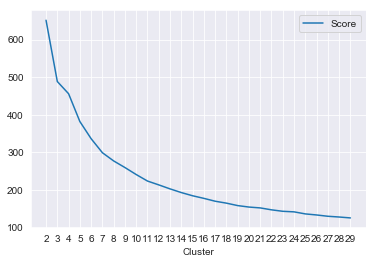

In [19]:
pd.DataFrame(calinski_harabasz_list).set_index('Cluster').plot()
plt.xticks(range(2,30))
plt.show()

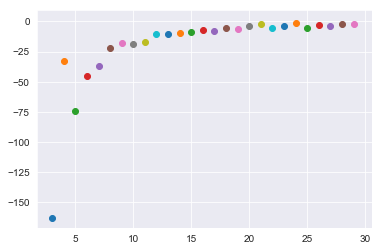

In [20]:
last = calinski_harabasz_list[0]['Score']
for i in calinski_harabasz_list[1:]:
    plt.scatter(i['Cluster'],(i['Score']- last))
    last = i['Score']

In [21]:
k_means = KMeans(n_clusters=4)

# Run the clustering algorithm
k_means.fit(scaled_df) 

# Generate cluster index values for each row
cluster_assignments = k_means.predict(scaled_df)
sho= label_df
sho['Cluster'] = cluster_assignments


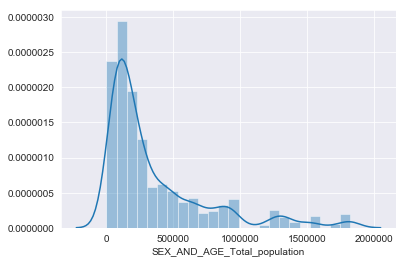

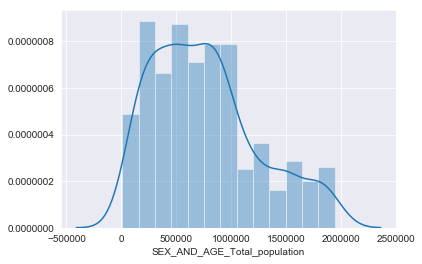

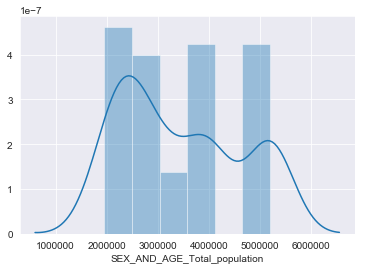

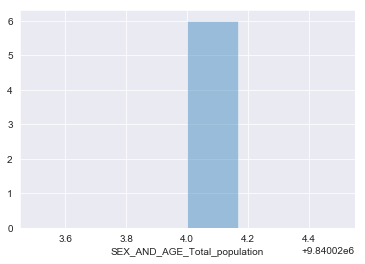

In [22]:
for i in sho['Cluster'].unique():
    sns.distplot(sho.loc[sho['Cluster'] == i]['SEX_AND_AGE_Total_population'])
    
    plt.show()

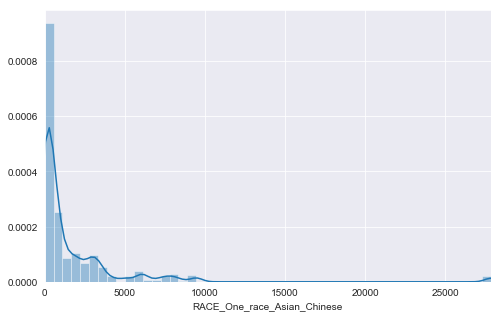

502.0


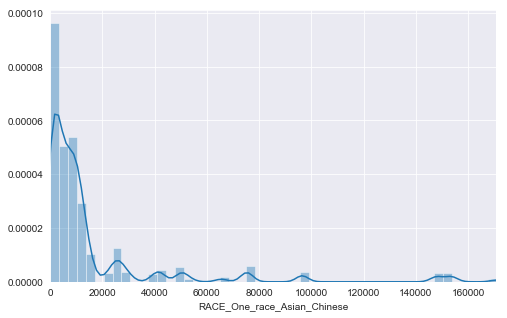

6555.0


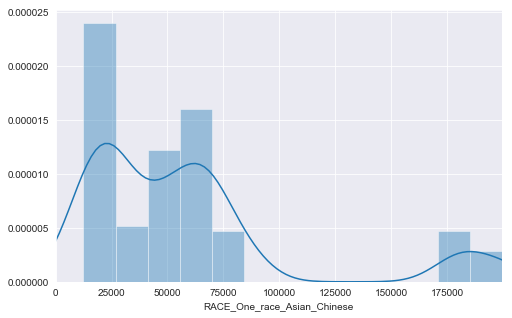

46604.0


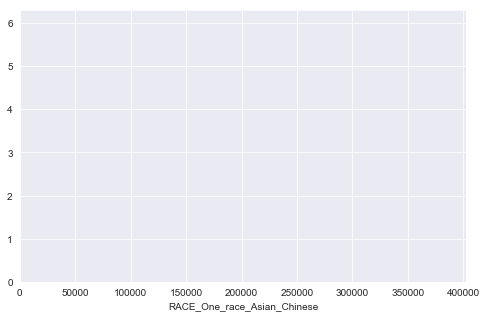

402562.0


In [23]:
for i in sho['Cluster'].unique():
    plt.figure(figsize=(8,5))
    sns.distplot(sho.loc[sho['Cluster'] == i]['RACE_One_race_Asian_Chinese'])
    plt.xlim(0,sho.loc[sho['Cluster'] == i]['RACE_One_race_Asian_Chinese'].max())
    plt.show()
    print(sho.loc[sho['Cluster'] == i]['RACE_One_race_Asian_Chinese'].median())

In [24]:
show2 =df
show2['Cluster'] = df.Provider_Id.apply(lambda x: sho['Cluster'][x])

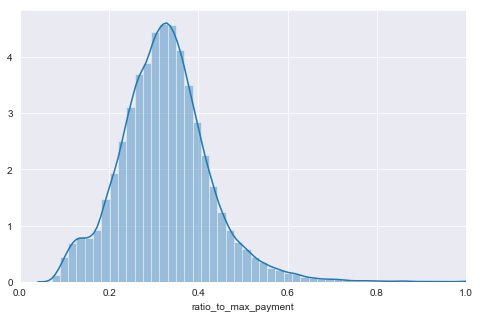

0.3215918704062379


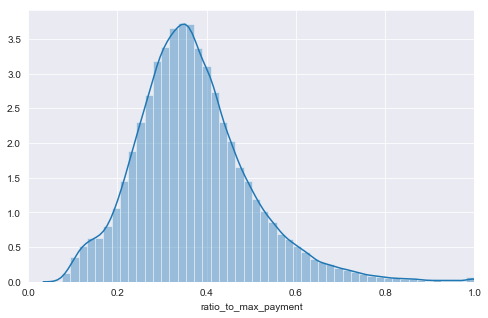

0.3566631981069081


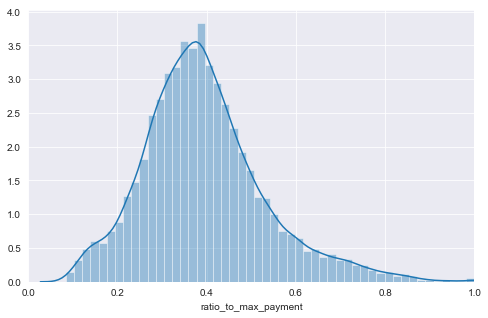

0.3800127668699641


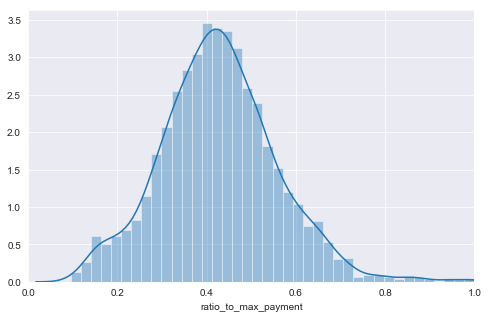

0.42292496665322715


In [25]:
column= 'ratio_to_max_payment'
for i in show2['Cluster'].unique():
    plt.figure(figsize=(8,5))
    sns.distplot(show2.loc[show2['Cluster'] == i][column])
    plt.xlim(0,show2.loc[show2['Cluster'] == i][column].max())
    plt.show()
    print(show2.loc[show2['Cluster'] == i][column].median())